IMPORT ALL THE NECESSARY LIBRARIES

In [59]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from mpl_toolkits.mplot3d import Axes3D
import mplcursors
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [60]:
my_dataset =  pd.read_csv('/Users/da_learners_m1_18/Downloads/segmentation data.csv')

In [61]:
my_dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [62]:
my_dataset.keys()

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [63]:
my_dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Heatmap

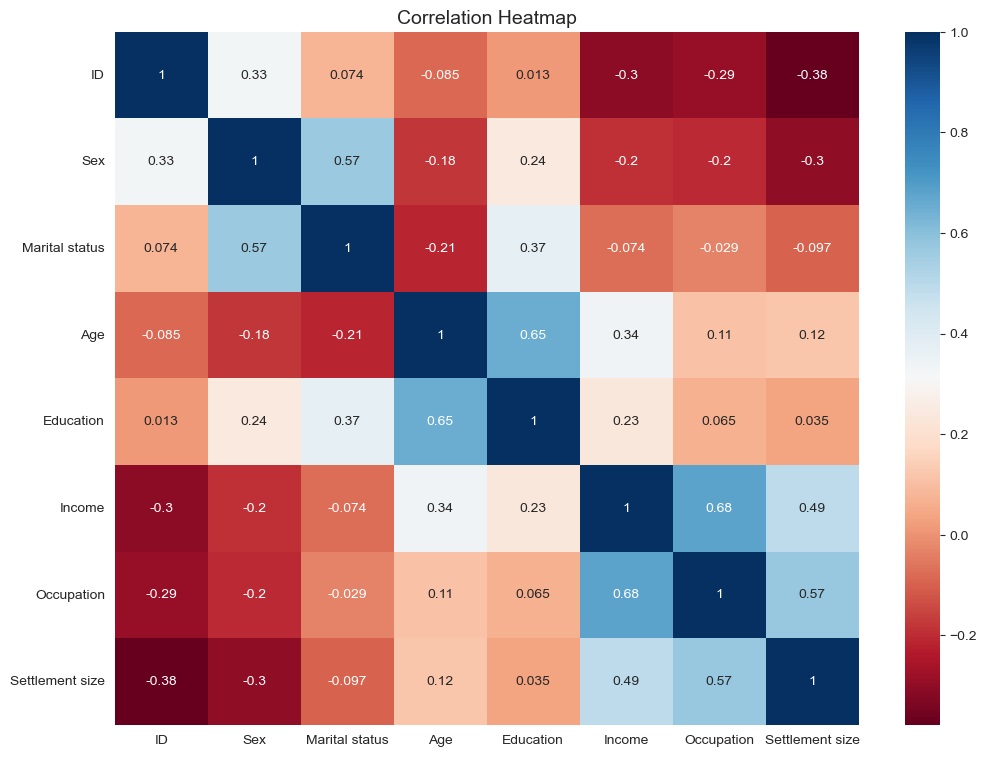

In [64]:
plt.figure(figsize=(12,9))
sns.heatmap(my_dataset.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()


The correletion between Education & Age is high, in order words we can say older people tend to be more highly educated

income and occupation?

Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.



In [65]:
# create scaler object
scaler = StandardScaler()
scaler.fit(my_dataset)

StandardScaler()

In [66]:
# scale the data
scaled_data=scaler.transform(my_dataset)
scaled_data

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

TO REDUCE DIMENSTION INTO 2

In [9]:
# Perform PCA with n_components=2 to reduce the variables to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca=pca.transform(scaled_data)

In [11]:
scaled_data.shape

(2000, 8)

In [12]:
x_pca.shape

(2000, 2)

In [13]:
x_pca

array([[ 2.85978214,  0.93667597],
       [ 0.94413038,  0.39449213],
       [-0.02303213, -0.8817974 ],
       ...,
       [-1.84179778, -2.15868138],
       [-2.71683211,  0.56139001],
       [-2.2097949 , -2.42344957]])

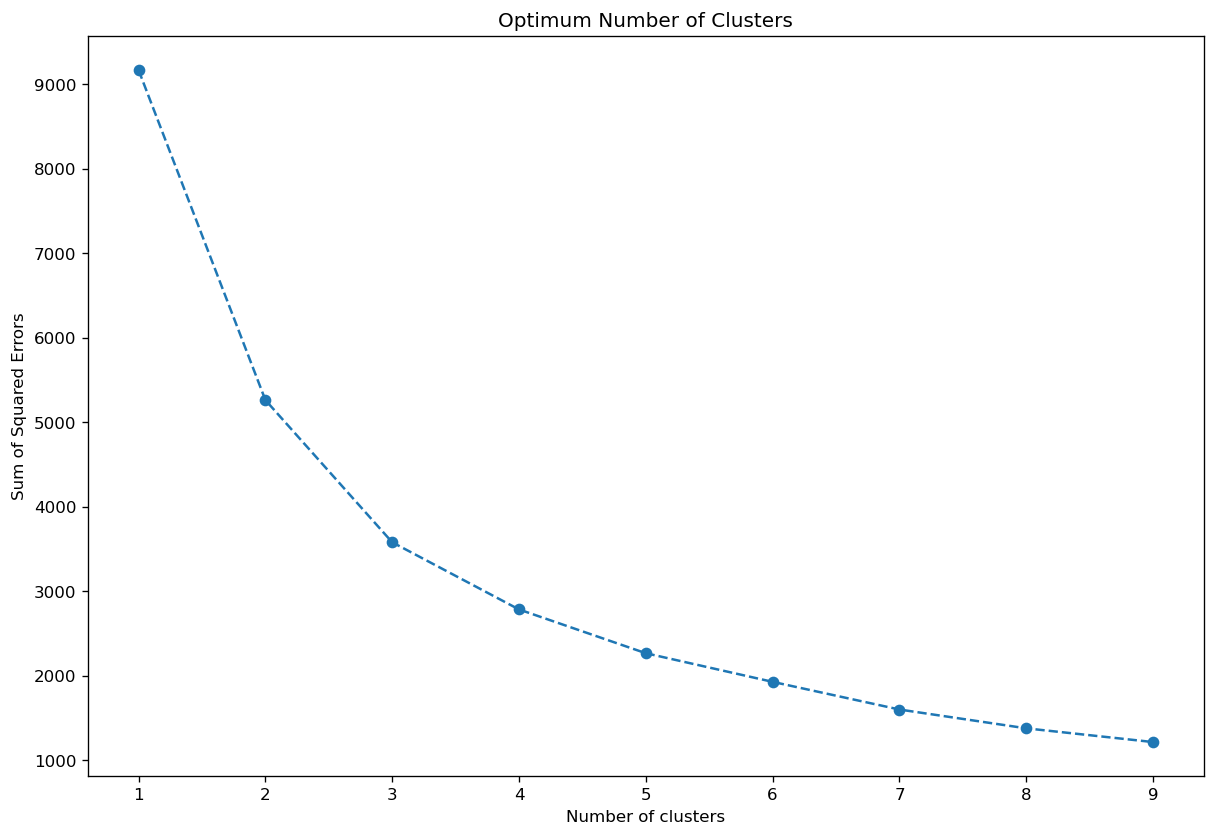

In [14]:
# Use the elbow method to find the optimum number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,8), dpi=120)
plt.plot(range(1, 10), sse,'o--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Optimum Number of Clusters')
plt.show()

In [15]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

df_pca_compenents = pd.DataFrame(
    data=pca.components_.round(2),
    columns=my_dataset.columns.values,
    index=['component 1','component 2']
)

df_pca_compenents

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.35,-0.33,-0.19,0.27,0.10,0.48,0.46,0.45
component 2,0.11,0.42,0.47,0.36,0.65,0.18,0.06,-0.03


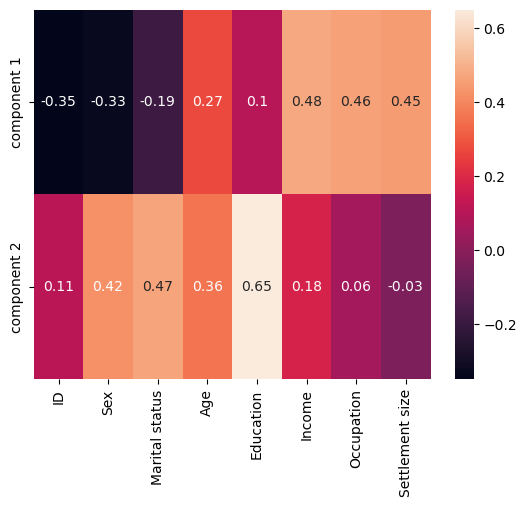

In [16]:
sns.heatmap(df_pca_compenents,annot=True)
plt.show()

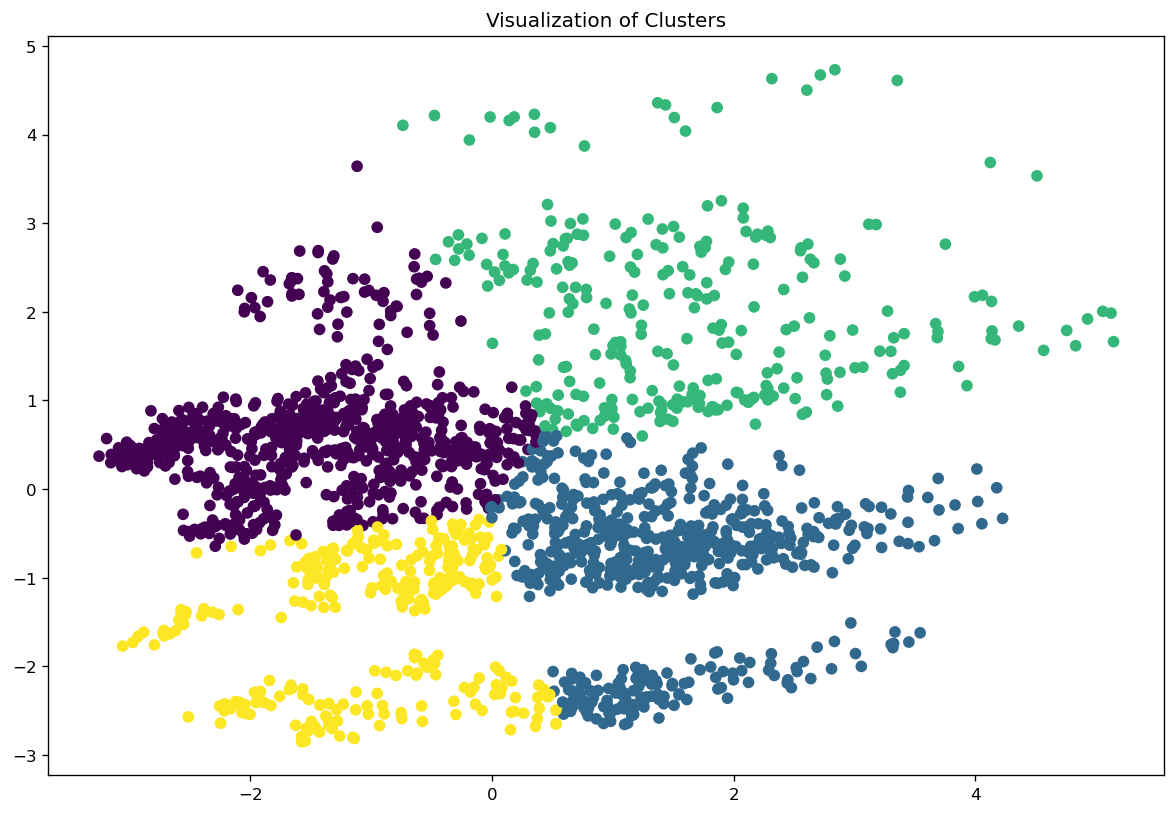

In [17]:

# Based on the elbow method, the optimum number of clusters is 4
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(x_pca)

# Get the cluster labels for each sample
labels = kmeans.labels_

# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.title('Visualization of Clusters')
plt.show()




Concatenate dataset with PCA

In [18]:
seg_pca_kmeans=pd.concat([my_dataset.reset_index(drop=True),pd.DataFrame(x_pca)],axis=1)

In [19]:
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124


In [73]:
seg_pca_kmeans['segment K-means PCA']=labels
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA,K segments
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2,k=three
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,1,k=two
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,3,k=four
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,1,k=two
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1,k=two


Group Accordingly

In [72]:
seg_pca_kmeans['K segments']=seg_pca_kmeans['segment K-means PCA'].map({0:'K= one',1:'k=two',2:'k=three',3:'k=four'})
seg_pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA,K segments
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2,k=three
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,1,k=two
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,3,k=four
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,1,k=two
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1,k=two
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,0,K= one
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,0,K= one
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,3,k=four
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,0,K= one


After Grouping

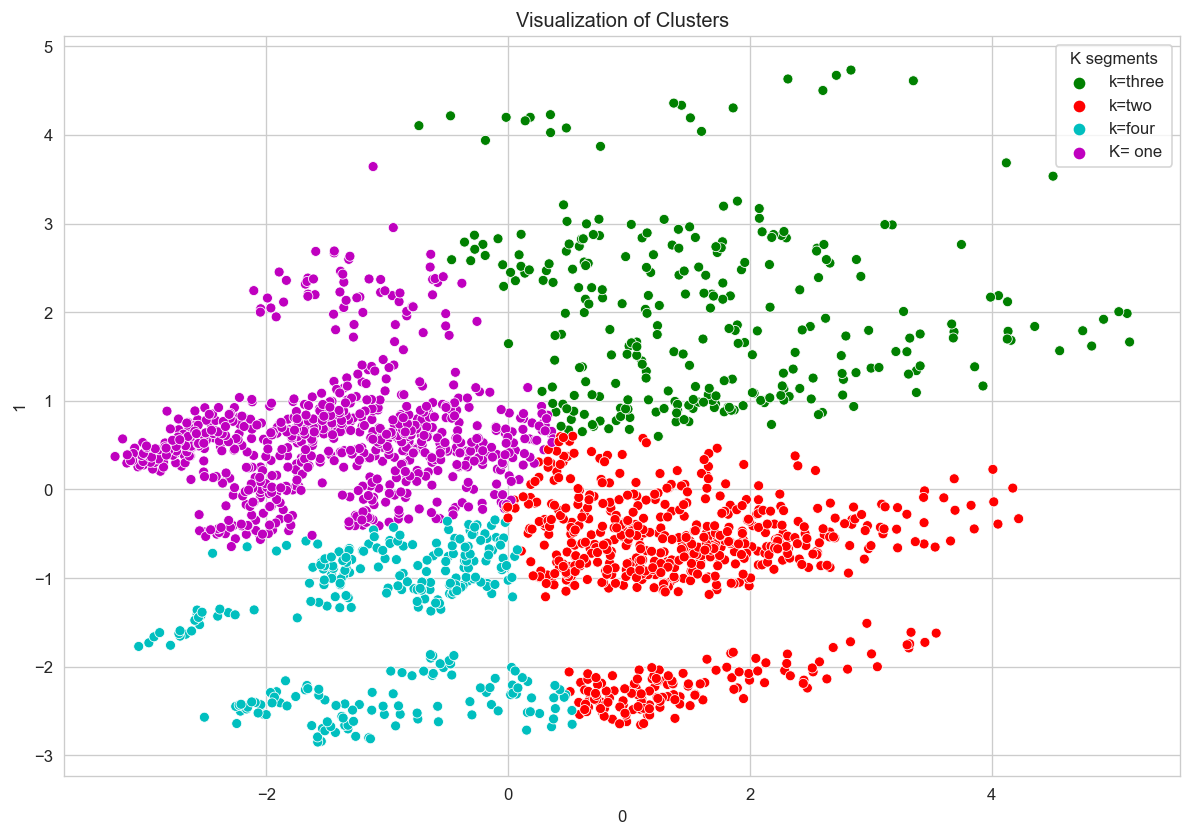

In [71]:
# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans.iloc[:,-4], seg_pca_kmeans.iloc[:,-3], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
#plt.scatter(x_pca[:, 0], x_pca[:, 1], label=seg_pca_kmeans['segment'])
plt.title('Visualization of Clusters')
plt.show()

In [70]:
from mpl_toolkits.mplot3d import Axes3D


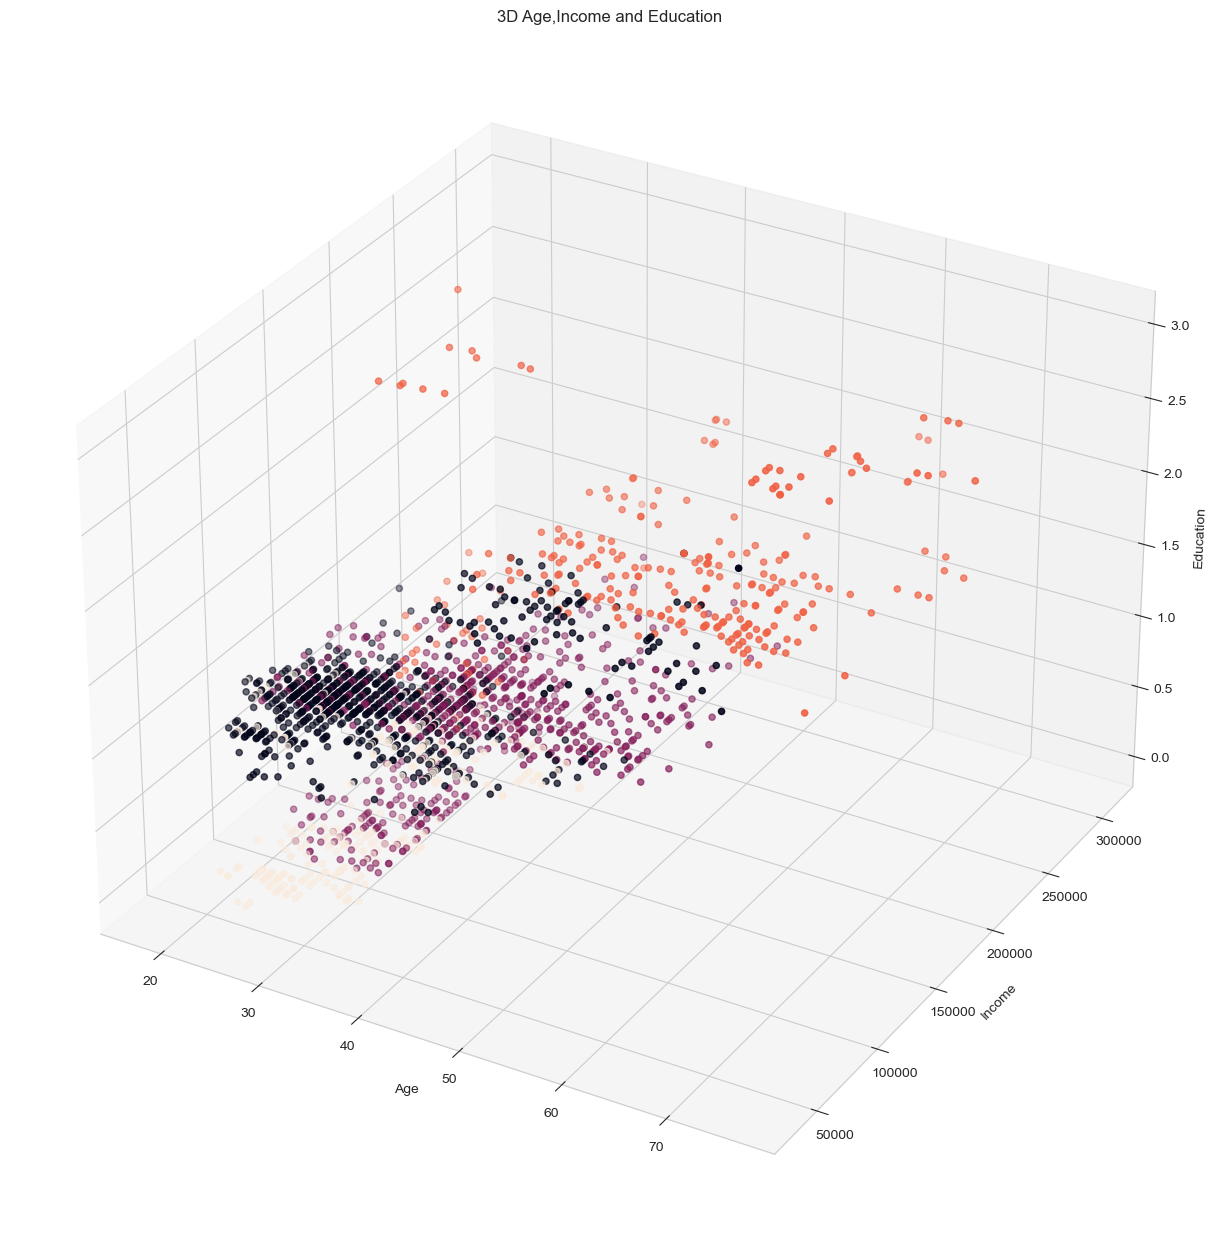

In [58]:
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig)

ax.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Income'], seg_pca_kmeans['Education'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education')
ax.set_title('3D Age,Income and Education')
plt.show()

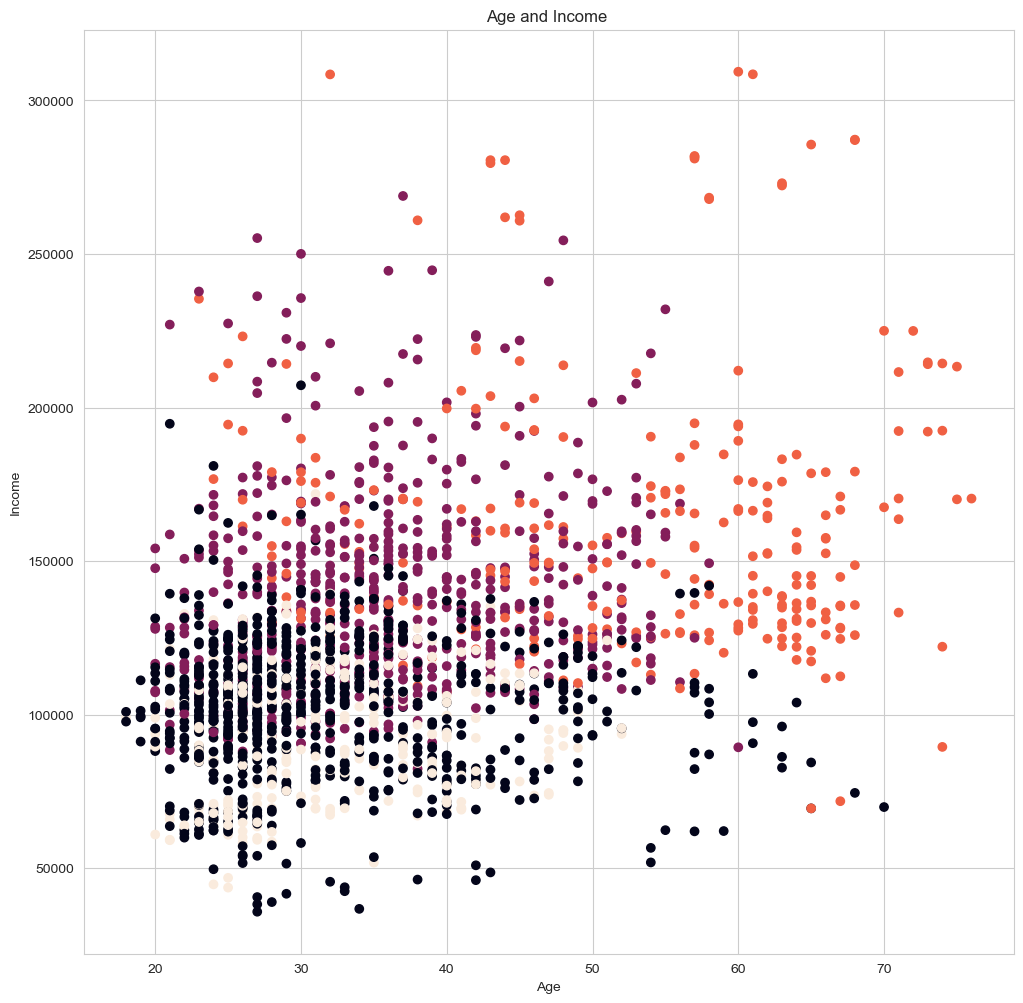

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Income'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income ')
plt.show()

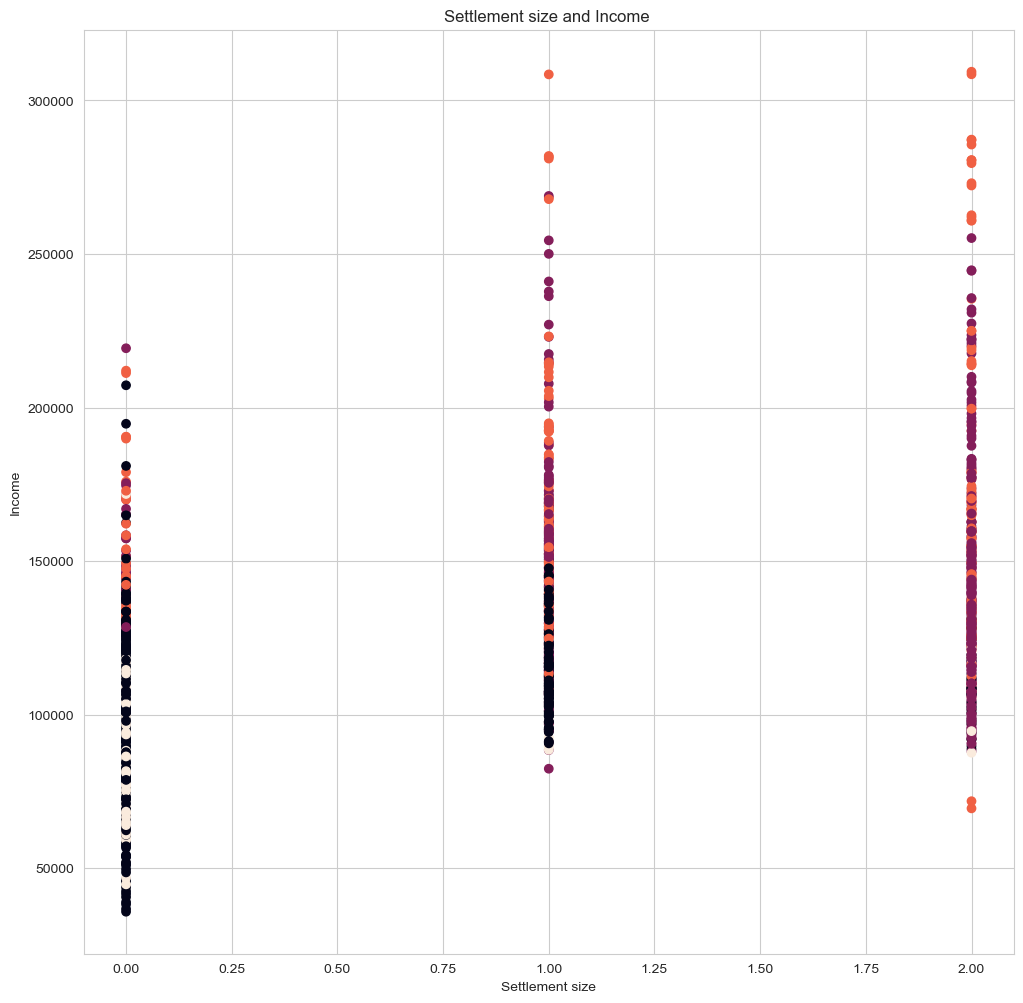

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Income'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('Settlement size')
plt.ylabel('Income')
plt.title('Settlement size and Income ')
plt.show()

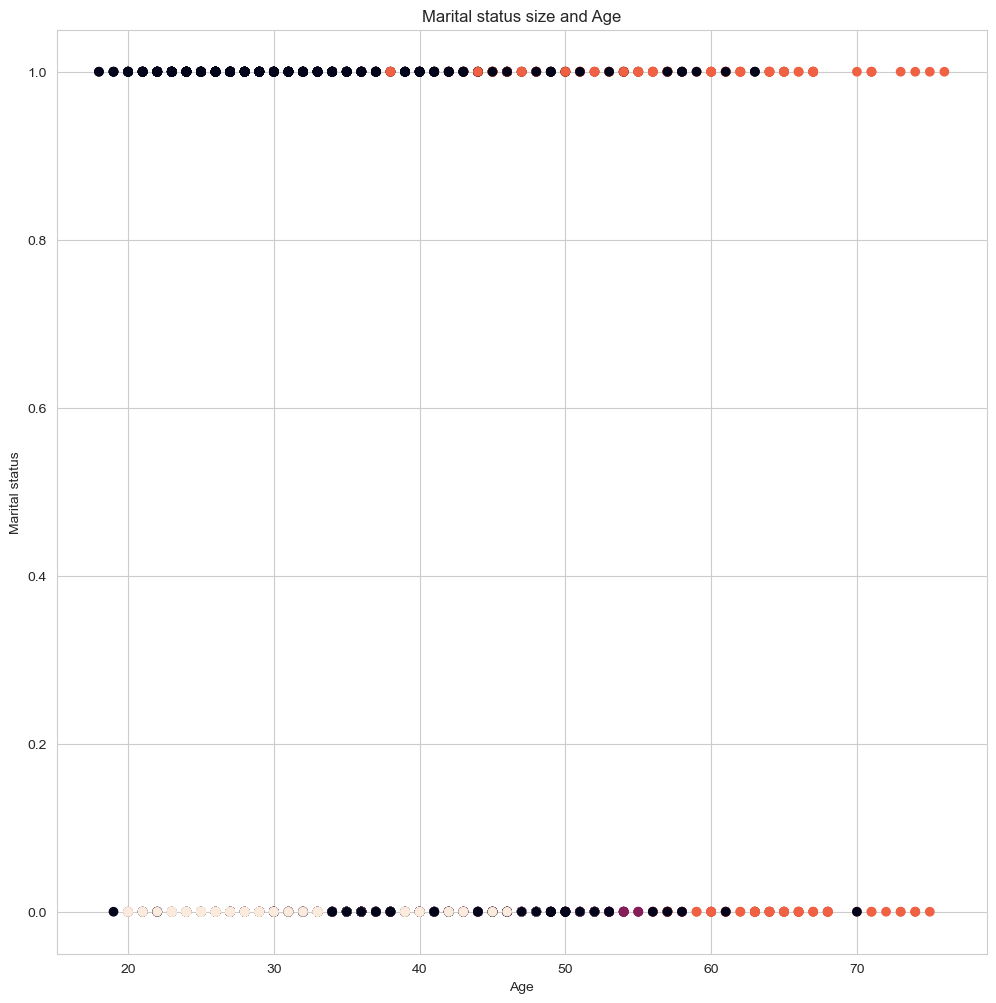

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Marital status'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('Age')
plt.ylabel('Marital status')
plt.title('Marital status size and Age')
plt.show()

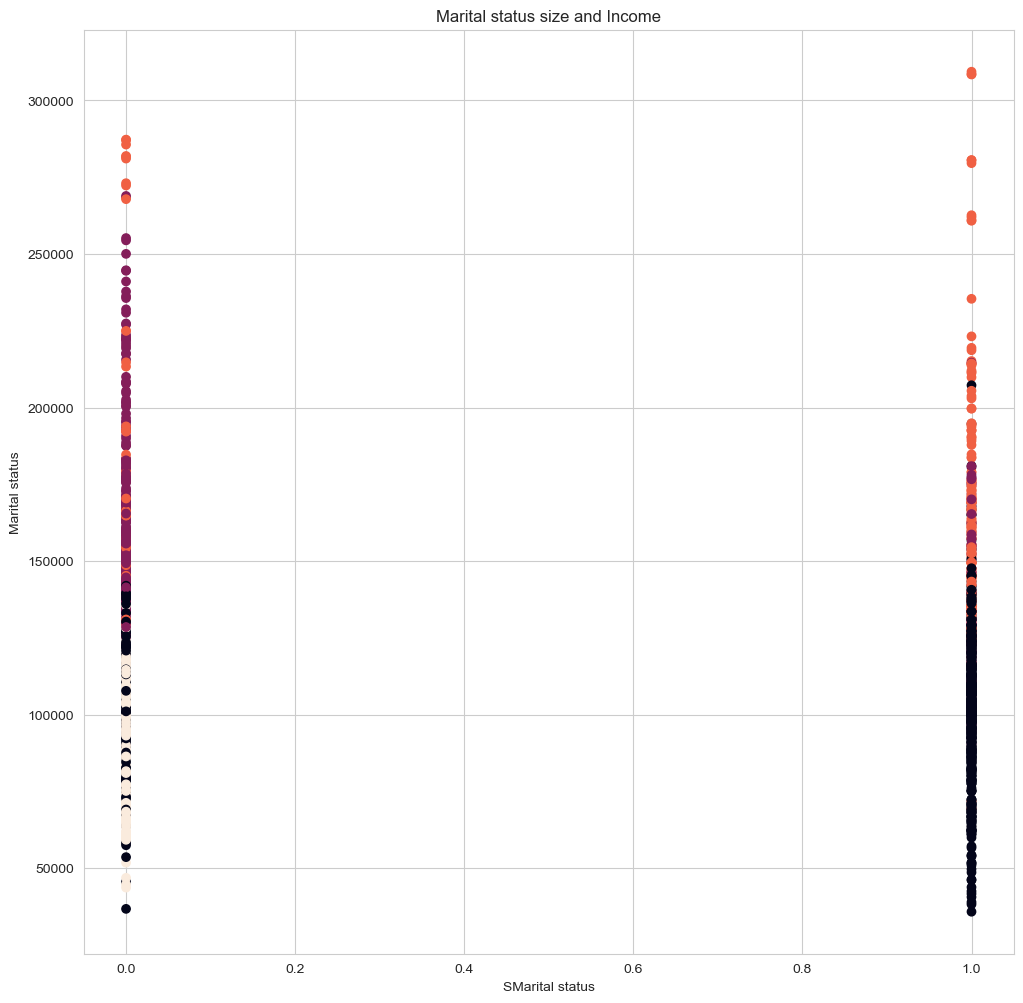

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Marital status'], seg_pca_kmeans['Income'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('SMarital status')
plt.ylabel('Marital status')
plt.title('Marital status size and Income')
plt.show()

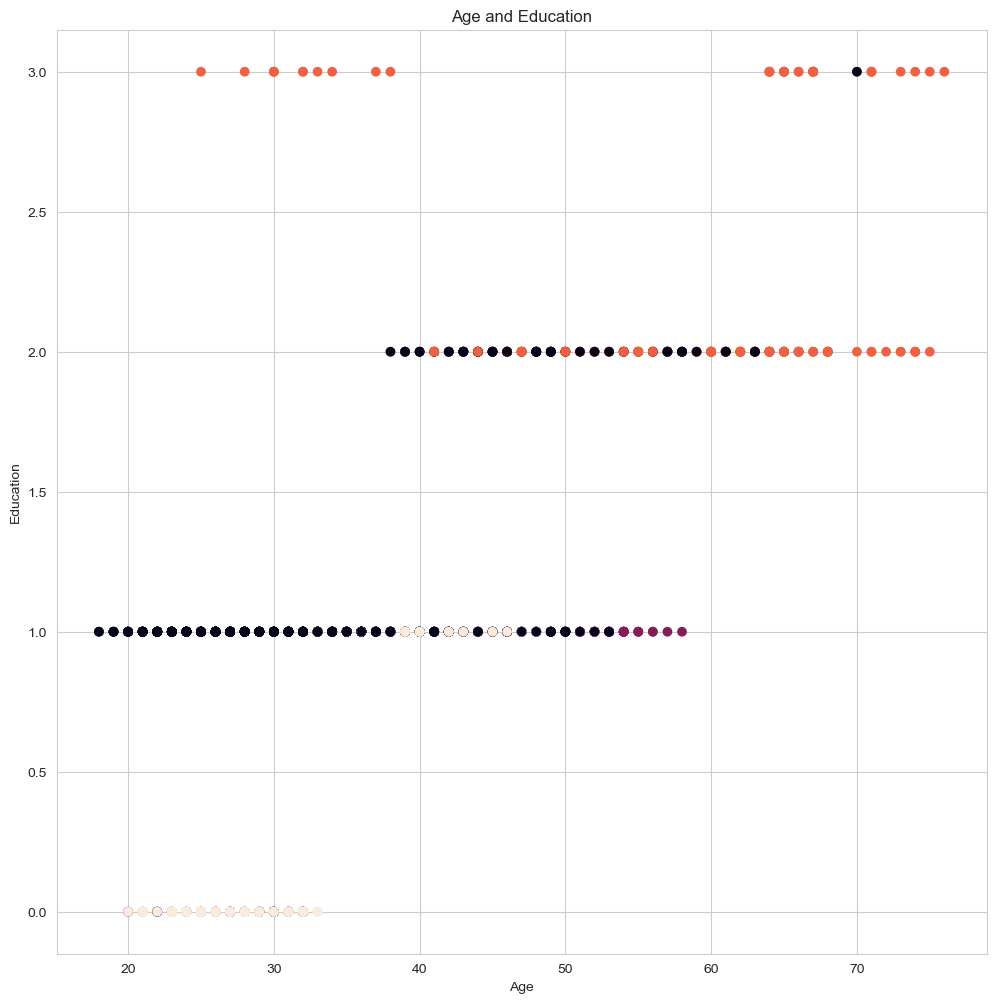

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Education'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Age and Education')
plt.show()

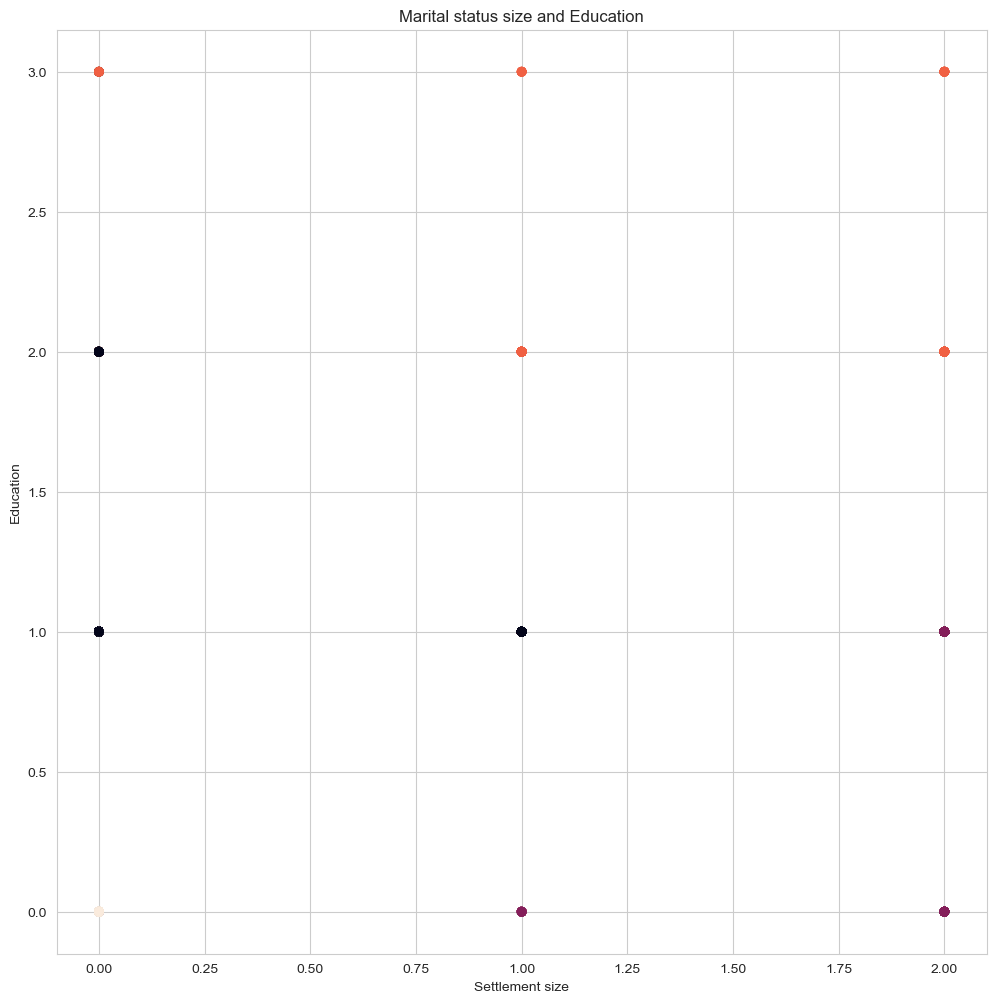

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 12))
plt.scatter(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Education'], c=seg_pca_kmeans['segment K-means PCA'])
plt.xlabel('Settlement size')
plt.ylabel('Education')
plt.title('Marital status size and Education')
plt.show()

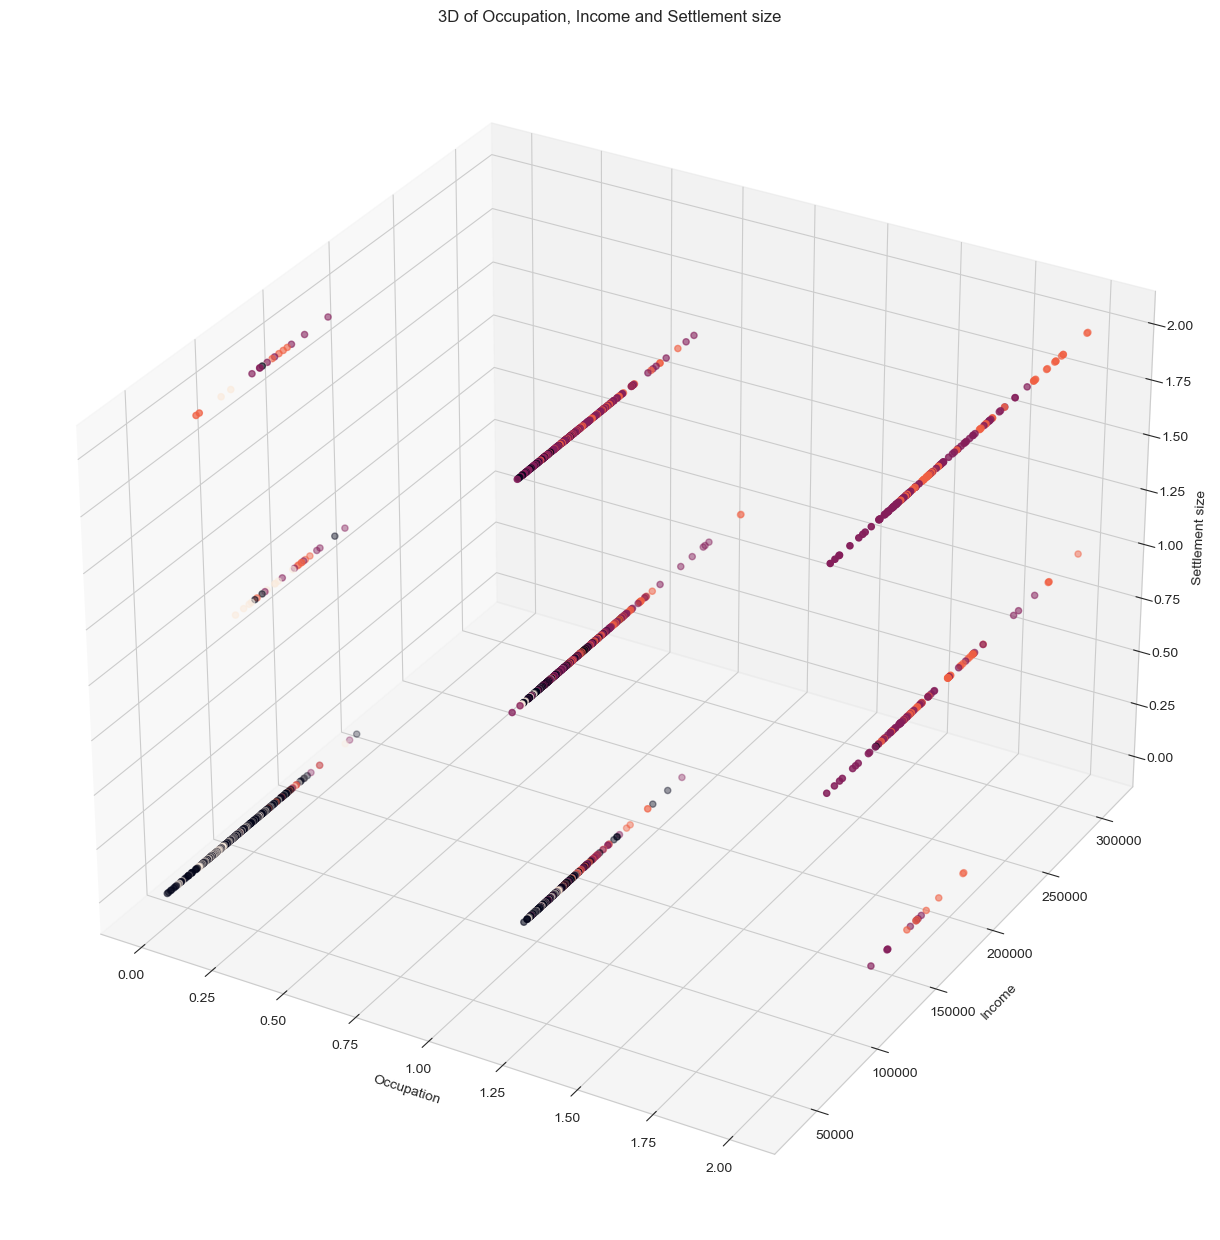

In [68]:
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig)
# Create scatter plot and store the PathCollection object in a variable
scatter = ax.scatter(seg_pca_kmeans['Occupation'], seg_pca_kmeans['Income'],seg_pca_kmeans['Settlement size'], c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Occupation')
ax.set_ylabel('Income')
ax.set_zlabel('Settlement size')
ax.set_title('3D of Occupation, Income and Settlement size')
# Create a function that returns the label to display when hovering over a point
def on_hover(sel):
    index = sel.target.index
    age = seg_pca_kmeans['Age'][index]
    income = seg_pca_kmeans['Income'][index]
    segment = seg_pca_kmeans['segment K-means PCA'][index]
    return f"Age: {age}, Income: {income}, Segment: {segment}"
# Use mplcursors to create an interactive cursor that displays the label when hovering over a point
mplcursors.cursor(scatter, hover=True).connect("add", on_hover)

plt.show()

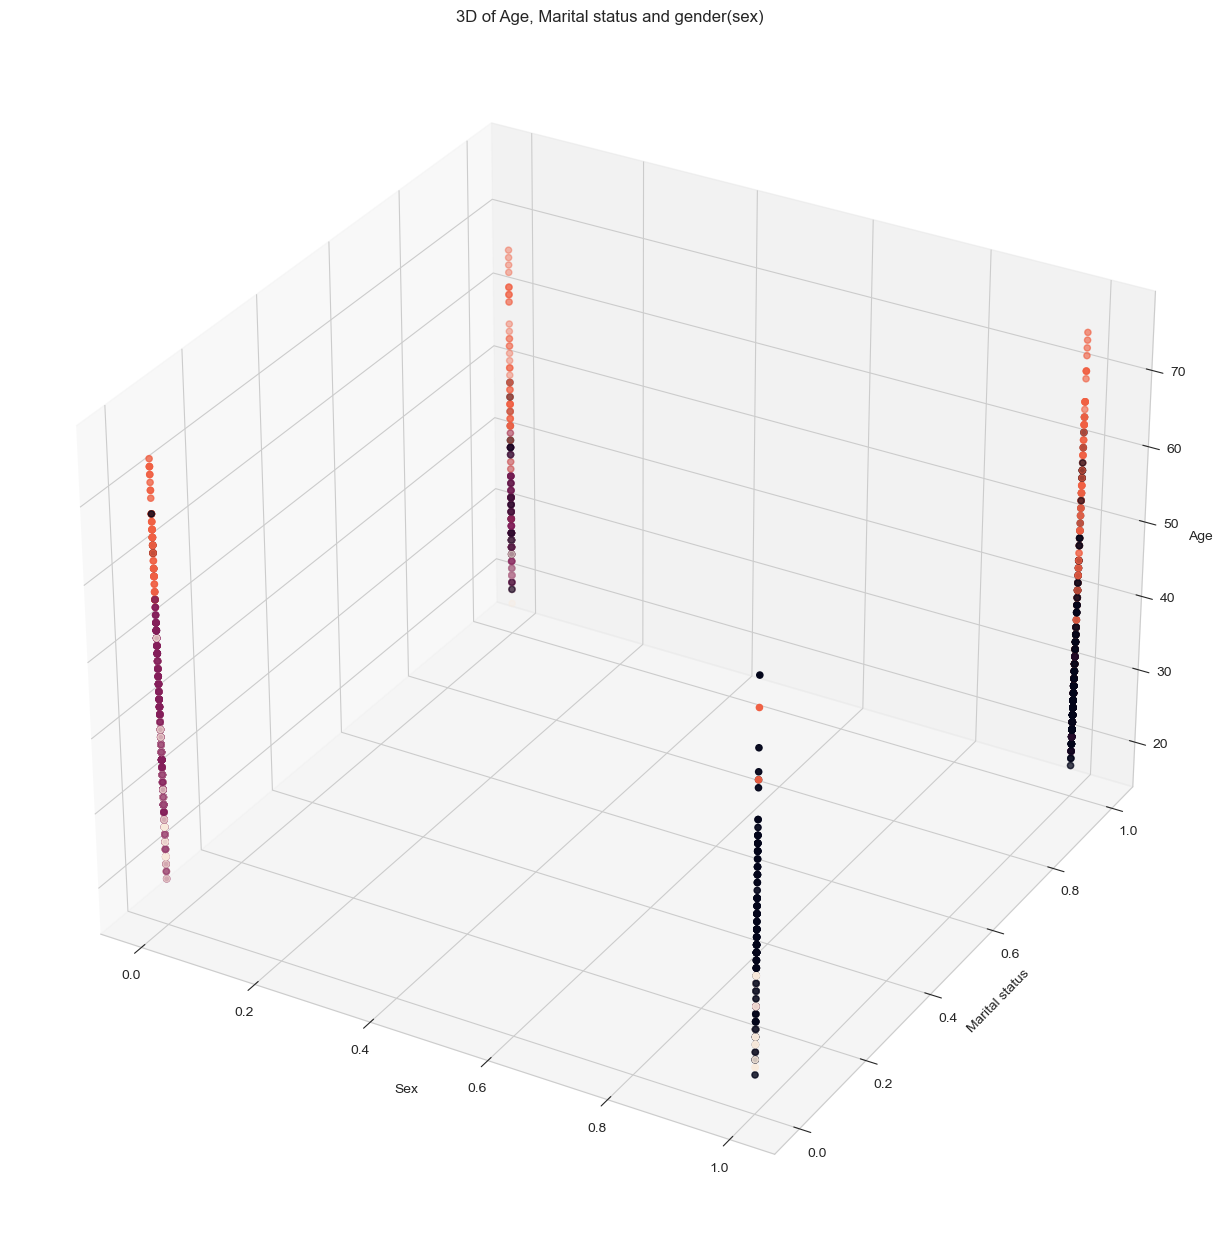

In [69]:
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig)
# Create scatter plot and store the PathCollection object in a variable
scatter = ax.scatter(seg_pca_kmeans['Sex'], seg_pca_kmeans['Marital status'],seg_pca_kmeans['Age'], c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Sex')
ax.set_ylabel('Marital status')
ax.set_zlabel('Age')
ax.set_title('3D of Age, Marital status and gender(sex)')
# Create a function that returns the label to display when hovering over a point
def on_hover(sel):
    index = sel.target.index
    age = seg_pca_kmeans['Age'][index]
    income = seg_pca_kmeans['Income'][index]
    segment = seg_pca_kmeans['segment K-means PCA'][index]
    return f"Age: {age}, Income: {income}, Segment: {segment}"
# Use mplcursors to create an interactive cursor that displays the label when hovering over a point
mplcursors.cursor(scatter, hover=True).connect("add", on_hover)
plt.show()